In [70]:
# Dependencies
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np

In [38]:
hostname = 'localhost'
username = 'postgres'
password = 'postgres'
database = 'SQL-Challenge'
port = 5432

#Create engine
engine = create_engine(f'postgresql://{username}:{password}@{hostname}:{port}/{database}?sslmode=disable')
conn = engine.connect()

In [41]:
# Query all records in the file
data = pd.read_sql("SELECT * FROM salaries", conn)

In [48]:
# Preview the data
data.head()

,emp_no,salary,from_date,to_date,Salary Range
0,10001,60117,1986-06-26,1987-06-26,$55k-$70k
1,10002,65828,1996-08-03,1997-08-03,$55k-$70k
2,10003,40006,1995-12-03,1996-12-02,$40k-$55k
3,10004,40054,1986-12-01,1987-12-01,$40k-$55k
4,10005,78228,1989-09-12,1990-09-12,$70k-$85k


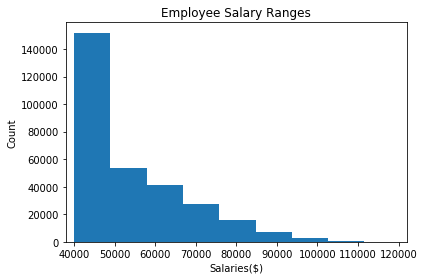

In [55]:
# Create histogram to view most common salary ranges
salaries = data["salary"]
plt.hist(salaries)
plt.xlabel('Salaries($)')
plt.ylabel('Count')
plt.title('Employee Salary Ranges')
plt.xlim(38000,122000)
plt.tight_layout()
plt.show()

In [62]:
# Import title table
titles = pd.read_sql("SELECT * FROM titles", conn)

# Merge salaries and titles tables
salaries_titles = pd.merge(data, titles, on="emp_no")
salaries_titles.dtypes

emp_no             int64
salary             int64
from_date_x       object
to_date_x         object
Salary Range    category
title             object
from_date_y       object
to_date_y         object
dtype: object

In [63]:
# Choose columns needed for bar chart
df = salaries_titles[["salary","title"]]
df.sample(10)

,salary,title
67977,55699,Senior Engineer
174512,40000,Senior Engineer
251031,53778,Senior Engineer
305224,81354,Staff
30995,47879,Staff
206736,40000,Assistant Engineer
82953,66572,Engineer
33644,58447,Senior Engineer
338809,40000,Engineer
205390,56299,Senior Engineer


In [67]:
# Find average salary by title
df_grouped = df.groupby('title')
df_mean = round(df_grouped.mean(),2)
print(df_mean)

salary
title                       
Assistant Engineer  48493.20
Engineer            48539.78
Manager             51531.04
Senior Engineer     48506.75
Senior Staff        58503.29
Staff               58465.27
Technique Leader    48580.51


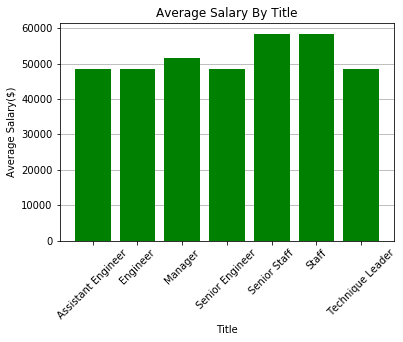

In [80]:
# Create bar chart of average salary by title
x_axis = list(df_mean.index.values)
values = df_mean['salary']
plt.bar(x_axis, values, color='g',align='center',zorder=3)
plt.title("Average Salary By Title")
plt.xlabel("Title")
plt.ylabel("Average Salary($)")
plt.xticks(rotation=45)
plt.grid(axis='y', zorder=0)